# Task 1.2 DataPreparation

In [118]:
import math
import sys
import os
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt

First of all, we upload the clean datasets obtained in the Data Understanding section.

In [119]:
df_incidents = pd.read_csv('../datasets_clean/incidents_clean.csv', sep=',', index_col=0)
df_poverty = pd.read_csv('../datasets_clean/poverty_clean.csv', sep=',', index_col=0)
df_elections = pd.read_csv('../datasets_clean/elections_clean.csv', sep=',', index_col=0)

In [120]:
df_incidents.describe()

,latitude,longitude,congressional_district,avg_age_participants,n_participants_child,n_participants_teen,n_participants_adult,n_males,n_females,n_killed,n_injured,n_arrested,n_unharmed,n_participants,year
count,174421.000000,174421.000000,164507.000000,174421.000000,174421.000000,174421.000000,174421.000000,174421.000000,174421.000000,174421.000000,174421.000000,174421.000000,174421.000000,174421.000000,174421.000000
mean,37.659729,-89.274100,7.965898,30.096783,0.024561,0.140465,1.542263,1.526152,0.220868,0.323361,0.543811,0.533777,0.423194,1.835157,2015.866547
std,5.108931,14.309482,8.426300,12.416426,0.189187,0.470008,1.090203,1.006156,0.501147,0.574439,0.753984,0.869459,0.857220,1.192104,1.190464
min,19.111400,-171.429000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2013.000000
25%,33.977300,-93.634200,2.000000,21.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2015.000000
50%,38.665300,-86.510500,5.000000,27.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,2016.000000
75%,41.527700,-80.005700,10.000000,36.000000,0.000000,0.000000,2.000000,2.000000,0.000000,1.000000,1.000000,1.000000,1.000000,2.000000,2017.000000
max,71.336800,-67.271100,53.000000,100.000000,11.000000,27.000000,103.000000,61.000000,23.000000,50.000000,53.000000,63.000000,28.000000,103.000000,2018.000000


## Data casting
We cast the columns to proper datatypes.

In [121]:
# Let's see the types of the columns of the incidents dataset
df_incidents.dtypes

date                          object
state                         object
city_or_county                object
address                       object
latitude                     float64
longitude                    float64
congressional_district       float64
avg_age_participants         float64
n_participants_child         float64
n_participants_teen          float64
n_participants_adult         float64
n_males                      float64
n_females                    float64
n_killed                       int64
n_injured                      int64
n_arrested                   float64
n_unharmed                   float64
n_participants               float64
incident_characteristics1     object
year                         float64
dtype: object

In [122]:
df_incidents['date'] = pd.to_datetime(df_incidents['date'])
df_incidents['state'] = df_incidents['state'].astype('string')
df_incidents['city_or_county'] = df_incidents['city_or_county'].astype('string')
df_incidents['city_or_county'] = df_incidents['city_or_county'].astype('string')
df_incidents['incident_characteristics1']=df_incidents['incident_characteristics1'].astype('string')
df_incidents['address'] = df_incidents['address'].astype('string')

In [123]:
# Let's see the types of the columns of the poverty dataset
df_poverty.dtypes

state                 object
year                   int64
povertyPercentage    float64
population             int64
dtype: object

In [124]:
df_poverty['year'] = df_poverty['year'].astype('float64')
df_poverty['state']=df_poverty['state'].astype('string')

In [125]:
# Let's see the types of the columns of the elections dataset
df_elections.dtypes

year                        int64
state                      object
congressional_district      int64
party                      object
candidatevotes            float64
totalvotes                float64
dtype: object

In [126]:
df_elections['year'] = df_elections['year'].astype('float64')
df_elections['congressional_district']=df_elections['congressional_district'].astype('float64')
df_elections['state']=df_elections['state'].astype('string')

## Distribution of the features

### Discretization of ages
We decide to divide the ages into 9 classes in order to better identify the average age of the participants of incidents.

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, '[18-24]'),
  Text(1, 0, '[25-34]'),
  Text(2, 0, '[35-44]'),
  Text(3, 0, '[45-54]'),
  Text(4, 0, '[12-17]'),
  Text(5, 0, '[55-64]'),
  Text(6, 0, '[65-74]'),
  Text(7, 0, '[0-11]'),
  Text(8, 0, '[75-100]')])

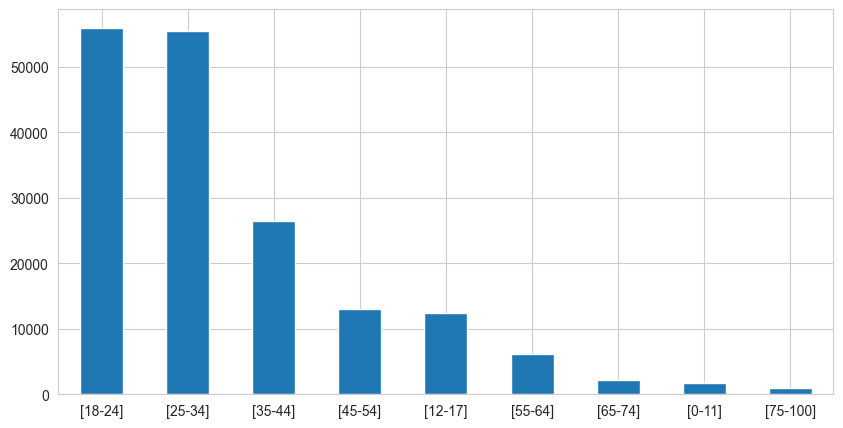

In [127]:
# We want to discretize the feature avg_age_participants in the following classes: [0-11], [12-17], [18-24], [25-34], [35-44], [45-54], [55-64], [65-74], [75-100]
# We create a new feature 'age_group' with the corresponding class
def f(x):
    if x <= 11:
        return '[0-11]'
    elif x <= 17:
        return '[12-17]'
    elif x <= 24:
        return '[18-24]'
    elif x <= 34:
        return '[25-34]'
    elif x <= 44:
        return '[35-44]'
    elif x <= 54:
        return '[45-54]'
    elif x <= 64:
        return '[55-64]'
    elif x <= 74:
        return '[65-74]'
    else:
        return '[75-100]'


df_incidents['age_group'] = df_incidents['avg_age_participants'].apply(f)
# histogram of the age_group
plt.figure(figsize=(10, 5))
df_incidents['age_group'].value_counts().plot(kind='bar')
# make the plot more readable
plt.xticks(rotation=0)

### Incidents' characteristics

<Axes: >

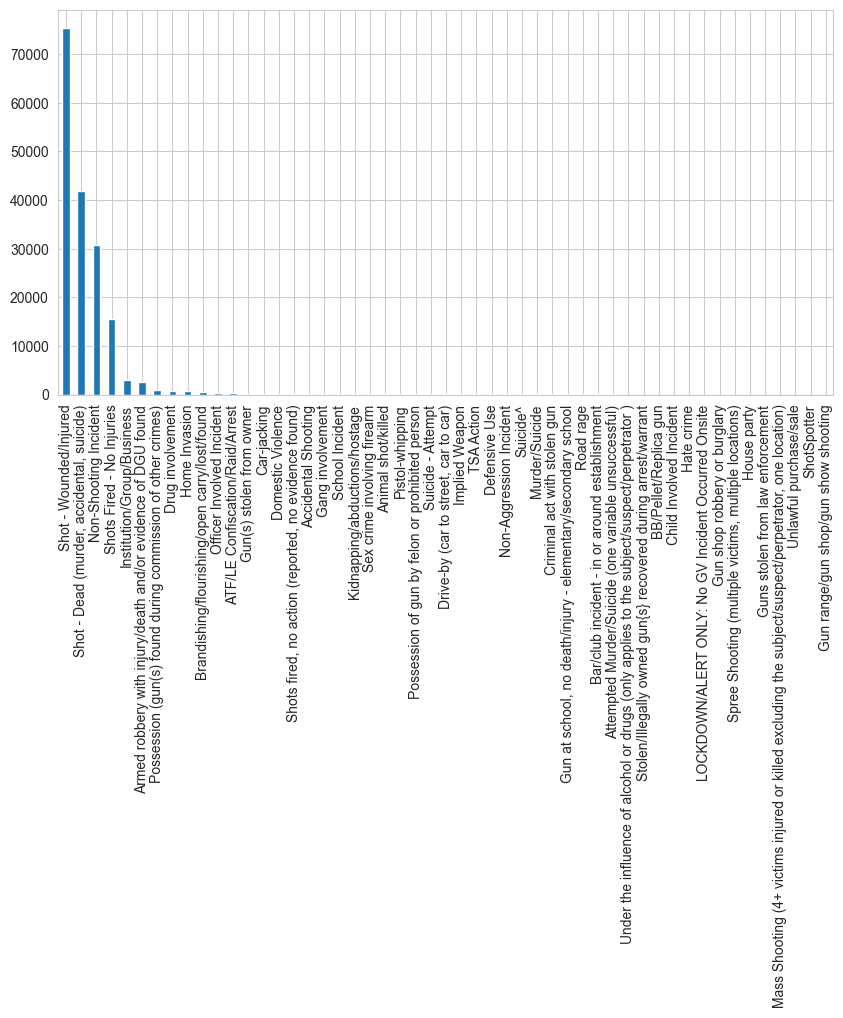

In [128]:
# Let's see the distribution of the feature characteristics1
plt.figure(figsize=(10, 5))
df_incidents['incident_characteristics1'].value_counts().plot(kind='bar')

We decide to reduce to just 5 labels: the 4 most common characteristics, i.e., 'Shoot-Wounded/Injured', 'Shoot-Dead(murder, accidental, suicide)', 'Non-Shooting Incident', 'Shots Fired-No Injuries', and we set the others to 'Other'.

In [129]:
print(df_incidents['incident_characteristics1'].value_counts().head(4))

Shot - Wounded/Injured                       75384
Shot - Dead (murder, accidental, suicide)    41916
Non-Shooting Incident                        30821
Shots Fired - No Injuries                    15595
Name: incident_characteristics1, dtype: Int64


In [130]:
# Define the four most common values
common_values = ['Shot - Wounded/Injured', 'Shot - Dead (murder, accidental, suicide)', 'Non-Shooting Incident', 'Shots Fired - No Injuries']

def change_uncommon_values(characteristic):
    if characteristic not in common_values:
        characteristic='Other'
    return characteristic

df_incidents['incident_characteristics1']=df_incidents['incident_characteristics1'].apply(change_uncommon_values)

<Axes: >

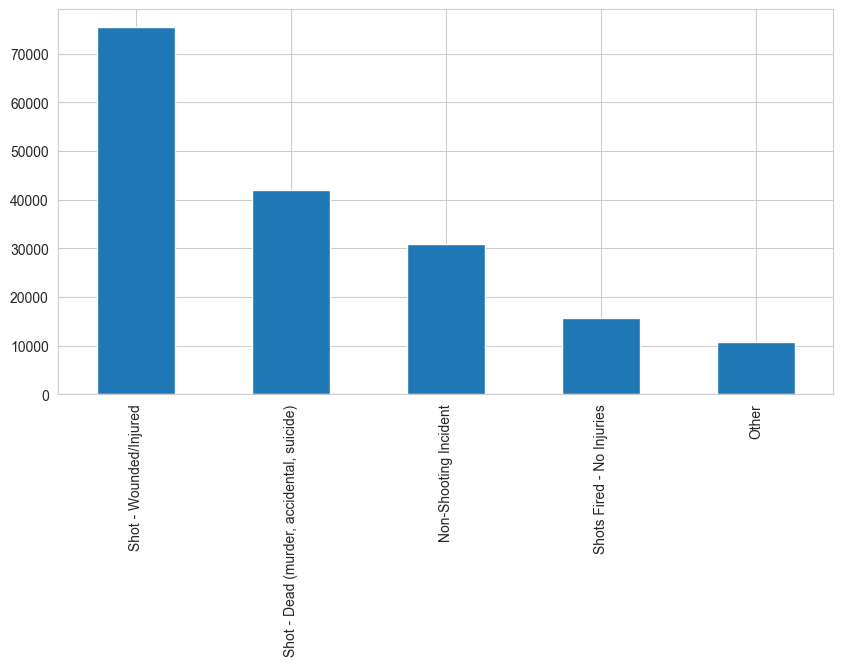

In [131]:
plt.figure(figsize=(10, 5))
df_incidents['incident_characteristics1'].value_counts().plot(kind='bar')

## Joining datasets
We also decided to join the incidents and poverty datasets in order to have, associated to each incident, the poverty percentage of that state in the year the incident occurred. Then, we joined the incidents and elections datasets, so that for each incident we have the data related to the election happened in the year, state, and congressional district of the incident. Notice that we have the election data just for the even years.


### Adjusting odd years
We fix the missing values of the election dataset in odd years by taking the values of the previous even year, in thw same state and congressional district.

In [132]:
# We create new rows with odd years in the elections dataset
df_elections_odd = df_elections.copy()
df_elections_odd['year'] = df_elections_odd['year']+1
# join the two datasets
df_elections = pd.concat([df_elections, df_elections_odd])
df_elections.sort_values(by=['state', 'congressional_district', 'year'])

,year,state,congressional_district,party,candidatevotes,totalvotes
0,1976.0,ALABAMA,1.0,REPUBLICAN,98257.0,157170.0
0,1977.0,ALABAMA,1.0,REPUBLICAN,98257.0,157170.0
435,1978.0,ALABAMA,1.0,REPUBLICAN,71711.0,112161.0
435,1979.0,ALABAMA,1.0,REPUBLICAN,71711.0,112161.0
870,1980.0,ALABAMA,1.0,REPUBLICAN,111089.0,117221.0
...,...,...,...,...,...,...
9569,2019.0,WYOMING,0.0,REPUBLICAN,127963.0,201245.0
10005,2020.0,WYOMING,0.0,REPUBLICAN,185732.0,278503.0
10005,2021.0,WYOMING,0.0,REPUBLICAN,185732.0,278503.0
10440,2022.0,WYOMING,0.0,REPUBLICAN,132206.0,198198.0


In [133]:
# We start by creating a temporary column 'year' in df_incidents
df_incidents['year']=df_incidents['date'].dt.year

In [134]:
# Then, we join the datasets
df_incidents = pd.merge(df_incidents, df_poverty, on=['state', 'year'], how='left')

In [135]:
df_incidents.head()

,date,state,city_or_county,address,latitude,longitude,congressional_district,avg_age_participants,n_participants_child,n_participants_teen,...,n_killed,n_injured,n_arrested,n_unharmed,n_participants,incident_characteristics1,year,age_group,povertyPercentage,population
0,2015-05-02,Indiana,Indianapolis,Lafayette Road and Pike Plaza,39.8322,-86.2492,7.0,19.0,0.0,0.0,...,0,1,0.0,0.0,1.0,Shot - Wounded/Injured,2015,[18-24],12.3,6608422
1,2017-04-03,Pennsylvania,Kane,5647 US 6,41.6645,-78.7856,5.0,62.0,0.0,0.0,...,1,0,0.0,0.0,1.0,"Shot - Dead (murder, accidental, suicide)",2017,[55-64],10.5,12787641
2,2016-10-15,District of Columbia,Washington,"1000 block of Bladensburg Road, NE",38.9030,-76.9820,1.0,26.0,0.0,0.0,...,0,1,0.0,0.0,2.0,Shot - Wounded/Injured,2016,[25-34],14.9,685815
3,2014-01-18,North Carolina,Wayne County,4700 block of U.S. Highway 70 East,35.1847,-77.9527,13.0,65.0,0.0,0.0,...,0,1,0.0,0.0,1.0,Shot - Wounded/Injured,2014,[65-74],15.3,9932887
4,2018-01-25,Louisiana,Zachary,18733 Samuels Rd,30.6069,-91.2270,6.0,26.0,0.0,0.0,...,2,1,2.0,0.0,5.0,Shot - Wounded/Injured,2018,[25-34],17.5,4659690


Since the 'congressional_district' feature in the elections dataset has value 0 if there is a single district in the state, and in the incidents dataset it has value 1 in such case, we have to adjust the values in the elections dataset before joining.

In [136]:
df_elections['congressional_district'] = df_elections['congressional_district'].replace(0, 1)

In [137]:
# We uniform the data types of the columns to be joined
df_incidents['year'] = df_incidents['year'].astype('float64')
df_incidents['congressional_district']=df_incidents['congressional_district'].astype('float64')

In [138]:
# We convert the state columns of the elections dataset to lowercase
df_incidents['state'] = df_incidents['state'].str.lower() 
df_elections['state'] = df_elections['state'].str.lower()

In [139]:
# We join the datasets
df_incidents = pd.merge(df_incidents, df_elections, on=['state', 'congressional_district', 'year'], how='left')
df_incidents.head()

,date,state,city_or_county,address,latitude,longitude,congressional_district,avg_age_participants,n_participants_child,n_participants_teen,...,n_unharmed,n_participants,incident_characteristics1,year,age_group,povertyPercentage,population,party,candidatevotes,totalvotes
0,2015-05-02,indiana,Indianapolis,Lafayette Road and Pike Plaza,39.8322,-86.2492,7.0,19.0,0.0,0.0,...,0.0,1.0,Shot - Wounded/Injured,2015.0,[18-24],12.3,6608422,DEMOCRAT,61443.0,112261.0
1,2017-04-03,pennsylvania,Kane,5647 US 6,41.6645,-78.7856,5.0,62.0,0.0,0.0,...,0.0,1.0,"Shot - Dead (murder, accidental, suicide)",2017.0,[55-64],10.5,12787641,REPUBLICAN,206761.0,307843.0
2,2016-10-15,district of columbia,Washington,"1000 block of Bladensburg Road, NE",38.9030,-76.9820,1.0,26.0,0.0,0.0,...,0.0,2.0,Shot - Wounded/Injured,2016.0,[25-34],14.9,685815,NaN,NaN,NaN
3,2014-01-18,north carolina,Wayne County,4700 block of U.S. Highway 70 East,35.1847,-77.9527,13.0,65.0,0.0,0.0,...,0.0,1.0,Shot - Wounded/Injured,2014.0,[65-74],15.3,9932887,REPUBLICAN,153991.0,268709.0
4,2018-01-25,louisiana,Zachary,18733 Samuels Rd,30.6069,-91.2270,6.0,26.0,0.0,0.0,...,0.0,5.0,Shot - Wounded/Injured,2018.0,[25-34],17.5,4659690,REPUBLICAN,186553.0,268525.0


## Definition of new indicators

### Severity of the incident
We start considering the ratio of killed and injured participants in the incidents with respect to the sum of killed, injured and unharmed participants (we didn't consider the total number of participants since in some cases there is a mismatch in these values). Then, we define the _severity_ of the incidents as the weighted mean of the ratios just defined. We assign to `ratio_killed` the weight 0.7, and to `ratio_injured` the weight 0.3.

In [141]:
total = df_incidents['n_killed'] + df_incidents['n_injured'] + df_incidents['n_unharmed']

df_incidents['ratio_killed'] = df_incidents['n_killed']/total*100
df_incidents['ratio_injured'] = df_incidents['n_injured']/total*100
df_incidents['ratio_unharmed'] = df_incidents['n_unharmed']/total*100

In [142]:
df_incidents['severity'] = 0.7*df_incidents['ratio_killed'] + 0.3*df_incidents['ratio_injured']

In [143]:
df_incidents['severity'].describe()

count    140315.000000
mean         34.420391
std          23.699626
min           0.000000
25%          15.000000
50%          30.000000
75%          56.666667
max          70.000000
Name: severity, dtype: float64

In [144]:
# See how many missing values there are in the incidents dataset
df_incidents.isnull().sum()

date                             0
state                            0
city_or_county                   0
address                      12278
latitude                         0
longitude                        0
congressional_district        9914
avg_age_participants             0
n_participants_child             0
n_participants_teen              0
n_participants_adult             0
n_males                          0
n_females                        0
n_killed                         0
n_injured                        0
n_arrested                       0
n_unharmed                       0
n_participants                   0
incident_characteristics1        0
year                             0
age_group                        0
povertyPercentage                0
population                       0
party                        11316
candidatevotes               12871
totalvotes                   12871
ratio_killed                 34106
ratio_injured                34106
ratio_unharmed      

In [145]:
# See how many instances have total = 0 (therefore we have to divide by 0 which gives a nan)
df_incidents[df_incidents['n_killed'] + df_incidents['n_injured'] + df_incidents['n_unharmed'] == 0].shape

(34106, 30)

We notice that the number of missing values of 'severity' are exactly the same as the number of instances with total = 0. This means that the missing values are due to the division by 0. We decide to fill the missing values with 0.

In [146]:
# Fill nan values with 0
df_incidents['severity'].fillna(0, inplace=True)

Text(0.5, 1.0, 'Distribution of the severity')

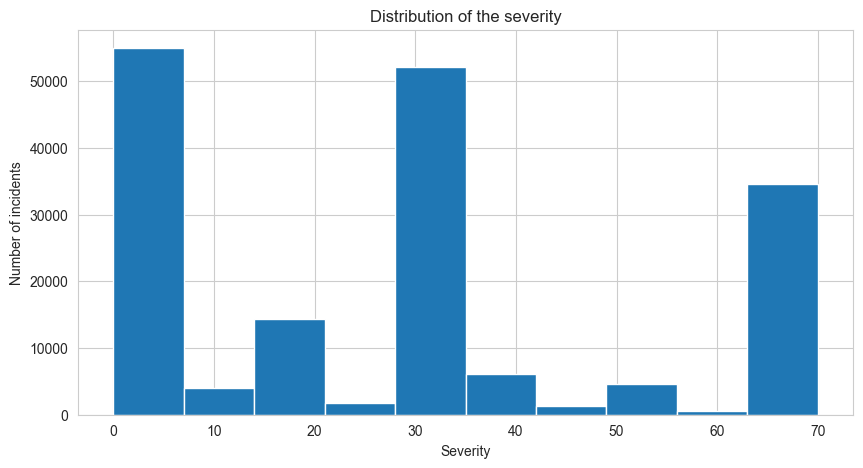

In [147]:
# Let's see the distribution of the severity
plt.figure(figsize=(10,5))
plt.hist(df_incidents['severity'], bins=10)
plt.xlabel('Severity')
plt.ylabel('Number of incidents')
plt.title('Distribution of the severity')

Looking at the histogram it is clear that there are 3 main peaks: one around 0, one around 30, and one around 70. We decide to define a categorical feature with values 'low', 'medium', 'high' based on the severity. We assign 'low' to those with severity <=20, 'medium' to those with severity <=40, and 'high' to the others.

Text(0.5, 1.0, 'Distribution of the severity')

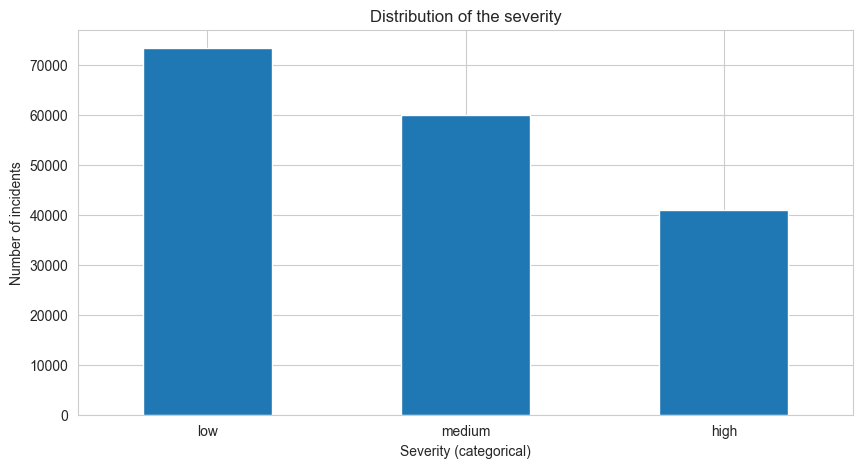

In [148]:
# Assign low to those with severity <=20, medium to those with severity <=40, high to the others
def f(x):
    if x<=20:
        return 'low'
    elif x<=40:
        return 'medium'
    else:
        return 'high'
df_incidents['severity_cat'] = df_incidents['severity'].apply(f)
# plot the distribution of the severity_cat
plt.figure(figsize=(10,5))
df_incidents['severity_cat'].value_counts().plot(kind='bar')
# make the plot more readable
plt.xticks(rotation=0)
plt.xlabel('Severity (categorical)')
plt.ylabel('Number of incidents')
plt.title('Distribution of the severity')


In [149]:
# We drop the columns of the ratios
df_incidents.drop(['ratio_killed', 'ratio_injured', 'ratio_unharmed'], axis=1, inplace=True)

In [150]:
# Columns of the incidents dataset
df_incidents.columns

Index(['date', 'state', 'city_or_county', 'address', 'latitude', 'longitude',
       'congressional_district', 'avg_age_participants',
       'n_participants_child', 'n_participants_teen', 'n_participants_adult',
       'n_males', 'n_females', 'n_killed', 'n_injured', 'n_arrested',
       'n_unharmed', 'n_participants', 'incident_characteristics1', 'year',
       'age_group', 'povertyPercentage', 'population', 'party',
       'candidatevotes', 'totalvotes', 'severity', 'severity_cat'],
      dtype='object')

### Involvement of minors
We define a similar metric for children and teen involvement: `severity_minor` will be the weighted mean of the ratios of children and teens involved in the incidents with respect to the sum of children, teens and adults involved in the incidents. We assign to `ratio_child` the weight 0.7, and to `ratio_teen` the weight 0.3.

<Axes: ylabel='Frequency'>

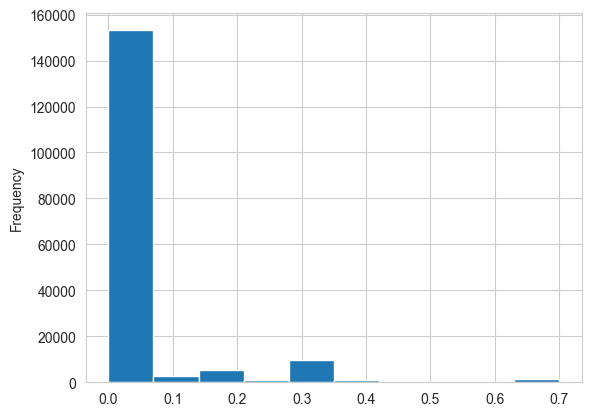

In [151]:
total = df_incidents['n_participants_child'] + df_incidents['n_participants_teen'] + df_incidents['n_participants_adult']
df_incidents['ratio_child'] = df_incidents['n_participants_child']/total
df_incidents['ratio_teen'] = df_incidents['n_participants_teen']/total

df_incidents['severity_minor'] = 0.7*df_incidents['ratio_child'] + 0.3*df_incidents['ratio_teen']
df_incidents.columns.drop(['ratio_child', 'ratio_teen'])
df_incidents['severity_minor'].plot(kind='hist', bins=10)

### Injured and killed in a given place and time
We investigate how many injured and killed people have been involved w.r.t the total injured and killed people in the same congressional district (and state) in a month.
In formula: $n_{killed}/n_{d,m}$, where $n_{d,m}$ is the sum of $n_{killed}$ in the same district $d$ and in the same month $m$.

In [152]:
# We group the incidents by state, congressional district, year-month, and we sum the number of killed people
df_incidents['year_month'] = df_incidents.date.dt.strftime('%y-%m')
df_incidents.year_month.isnull().sum()
tot_killed = df_incidents.groupby(['state', 'congressional_district', 'year_month'])['n_killed'].sum()

# Convert the Series to a DataFrame and reset the index
tot_killed_df = tot_killed.reset_index()

# Rename the 'n_killed' column to 'total_killed_district'
tot_killed_df = tot_killed_df.rename(columns={'n_killed': 'total_killed_district'})

# Print the resulting DataFrame
print(tot_killed_df)

         state  congressional_district year_month  total_killed_district
0      alabama                     1.0      14-01                      3
1      alabama                     1.0      14-02                      5
2      alabama                     1.0      14-03                      3
3      alabama                     1.0      14-04                      3
4      alabama                     1.0      14-05                      7
...        ...                     ...        ...                    ...
21112  wyoming                     1.0      17-05                      0
21113  wyoming                     1.0      17-06                      0
21114  wyoming                     1.0      17-07                      0
21115  wyoming                     1.0      17-08                      3
21116  wyoming                     1.0      17-09                      1

[21117 rows x 4 columns]


In [153]:
# We do the same for the injured
tot_injured = df_incidents.groupby(['state', 'congressional_district', 'year_month'])['n_injured'].sum()

# Convert the Series to a DataFrame and reset the index
tot_injured_df = tot_injured.reset_index()

# Rename the 'n_killed' column to 'total_injured_district'
tot_injured_df = tot_injured_df.rename(columns={'n_injured': 'total_injured_district'})

# Print the resulting DataFrame
print(tot_injured_df)

         state  congressional_district year_month  total_injured_district
0      alabama                     1.0      14-01                       2
1      alabama                     1.0      14-02                       3
2      alabama                     1.0      14-03                       1
3      alabama                     1.0      14-04                       3
4      alabama                     1.0      14-05                       3
...        ...                     ...        ...                     ...
21112  wyoming                     1.0      17-05                       2
21113  wyoming                     1.0      17-06                       2
21114  wyoming                     1.0      17-07                       0
21115  wyoming                     1.0      17-08                       2
21116  wyoming                     1.0      17-09                       1

[21117 rows x 4 columns]


In [154]:
# We join the 'total_killed_district' and 'total_injured_district' columns to the incidents dataset
df_incidents = pd.merge( df_incidents, tot_killed_df, on=['state', 'congressional_district', 'year_month'])
df_incidents = pd.merge(df_incidents, tot_injured_df, on=['state', 'congressional_district', 'year_month'])

We define the features 'killed_by_district' and 'injured_by_district' as the ratio of killed and injured people in the incident w.r.t. the total killed and injured people in the same congressional district (and state) in the same year-month. We impose that these features have value 0 if 'total_killed_district' or 'total_injured_district' is 0.

In [155]:
# We distinguish between the case with total_killed_district = 0, and total_killed_district != 0
def f(x, y):
    if y!=0:
        return x/y
    else:
        return 0
df_incidents['killed_by_district'] = df_incidents.apply(lambda row: f(row['n_killed'], row['total_killed_district']), axis=1)

df_incidents['injured_by_district'] = df_incidents.apply(lambda row: f(row['n_injured'], row['total_injured_district']), axis=1)

# We then drop the columns 'total_killed_district', 'total_injured_district'
df_incidents.drop(['total_killed_district', 'total_injured_district'], axis=1, inplace=True)

Text(0.5, 0, 'Ratio of killed people in the incident w.r.t. the total killed people in the same district in the same year-month')

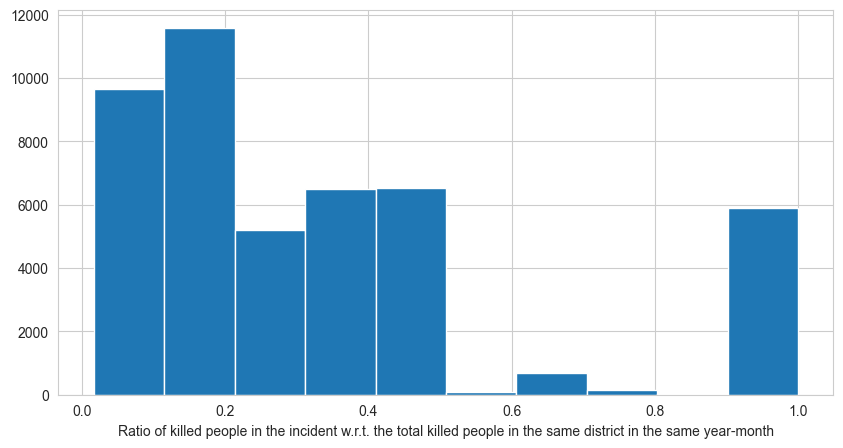

In [156]:
# Let's see the distribution of the feature 'killed_by_district'
plt.figure(figsize=(10, 5))
plt.hist(df_incidents.killed_by_district[df_incidents['killed_by_district']!=0], bins=10)
#title
plt.xlabel('Ratio of killed people in the incident w.r.t. the total killed people in the same district in the same year-month')

Text(0.5, 0, 'Ratio of injured people in the incident w.r.t. the total injured people in the same district in the same year-month')

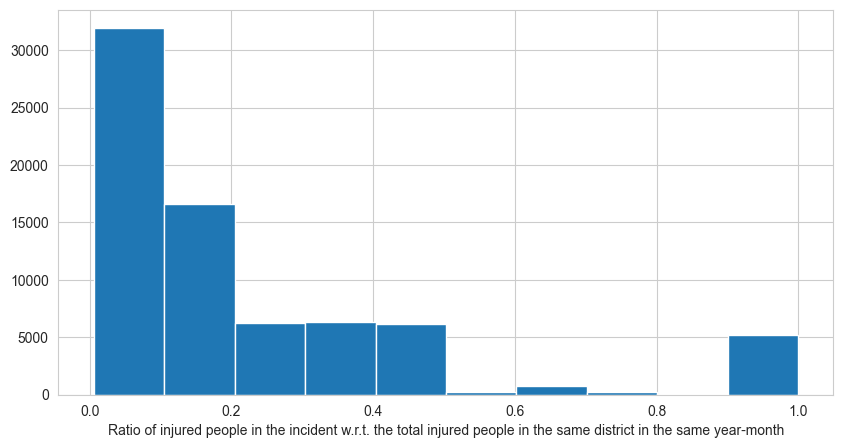

In [157]:
plt.figure(figsize=(10, 5))
plt.hist(df_incidents['injured_by_district'][df_incidents['injured_by_district']!=0], bins=10)
#title
plt.xlabel('Ratio of injured people in the incident w.r.t. the total injured people in the same district in the same year-month')

### Ratio of features
We consider the ratio of females, arrested, and unharmed people w.r.t. the total number of participants in the incident. We recall that in the actual dataset 'n_participants' is greater than 0, so these features are well-defined.


In [158]:
# Number of instances with n_participants = 0
df_incidents[df_incidents['n_participants']==0].shape

(0, 34)

In [159]:
df_incidents['female_ratio'] = df_incidents['n_females']/df_incidents['n_participants']*100
df_incidents['arrested_ratio'] = df_incidents['n_arrested']/df_incidents['n_participants']*100
df_incidents['unharmed_ratio'] = df_incidents['n_unharmed']/df_incidents['n_participants']*100

### Left/Right wing voters in the districts
We define the new indicator `right_or_left` as follows:
- We calculate the ratio of voters of the party of the candidate who won the election in the district w.r.t. the total number of voters in the district.
- If the winner is a Republican, we assign this ratio to `right_or_left`.
- If the winner is a Democrat, we assign 1 - the ratio to `right_or_left`.

We recall that in the actual dataset 'totalvotes' is greater than 0, so this feature is well-defined.

Moreover, an example to better understand the definition of the feature: if the winning party is Democrat and the democratic candidate won with 60% of the votes, then `right_or_left` will be 0.4.


In [160]:
# Number of instances with totalvotes = 0
df_incidents[df_incidents['totalvotes']==0].shape

(0, 37)

In [161]:
df_incidents['ratio_of_voters']= df_incidents['candidatevotes']/df_incidents['totalvotes']

# Definition of the new feature
def right_or_left(row):
    if row['party'] == 'REPUBLICAN':
        return row['ratio_of_voters']
    else:
        return 1-row['ratio_of_voters']
df_incidents['right_or_left'] = df_incidents.apply(right_or_left, axis=1)

<Axes: ylabel='Frequency'>

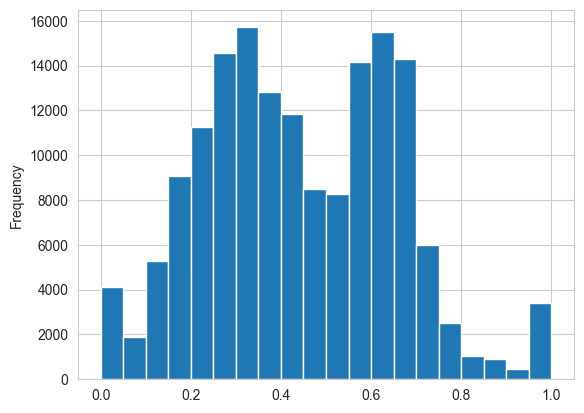

In [162]:
df_incidents['right_or_left'].plot(kind='hist', bins=20)

As we could imagine, the distribution of the feature is bimodal, since the winning party is either Republican or Democrat.

### Distance from the means
We define others indicators by computing the distance of a certain feature from the mean of that feature.

In [163]:
mean_killed = df_incidents['n_killed'].mean()
mean_injured = df_incidents['n_injured'].mean()
mean_participants = df_incidents['n_participants'].mean()
mean_participants_child = df_incidents['n_participants_child'].mean()
mean_participants_teen = df_incidents['n_participants_teen'].mean()
mean_participants_adult = df_incidents['n_participants_adult'].mean()
mean_females = df_incidents['n_females'].mean()
mean_males = df_incidents['n_males'].mean()

In [164]:
df_incidents['distance_mean_killed'] = (df_incidents['n_killed']-mean_killed)
df_incidents['distance_mean_injured'] = (df_incidents['n_injured']-mean_injured)
df_incidents['distance_mean_participants'] = (df_incidents['n_participants']-mean_participants)
df_incidents['distance_mean_participants_child'] = (df_incidents['n_participants_child']-mean_participants_child)
df_incidents['distance_mean_participants_teen'] = (df_incidents['n_participants_teen']-mean_participants_teen)
df_incidents['distance_mean_participants_adult'] = (df_incidents['n_participants_adult']-mean_participants_adult)
df_incidents['distance_mean_females'] = df_incidents['n_females'] - mean_females
df_incidents['distance_mean_males'] = df_incidents['n_males'] - mean_males

<Axes: ylabel='Frequency'>

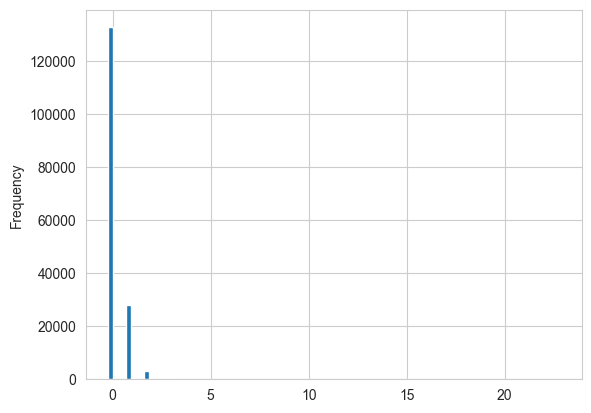

In [165]:
df_incidents['distance_mean_females'].plot(kind='hist', bins=100)

### Distance from the mean of the state
In a similar way, we can consider how far a certain feature is from the mean of that feature in the state where the incident occurred.

In [166]:
# We group the incidents by state and we compute the mean of the features
mean_killed_state = df_incidents.groupby(['state'])['n_killed'].mean()
mean_injured_state = df_incidents.groupby(['state'])['n_injured'].mean()
mean_participants_state = df_incidents.groupby(['state'])['n_participants'].mean()
mean_participants_child_state = df_incidents.groupby(['state'])['n_participants_child'].mean()
mean_participants_teen_state = df_incidents.groupby(['state'])['n_participants_teen'].mean()
mean_females_state = df_incidents.groupby(['state'])['n_females'].mean()

df_incidents['dfm_state_killed'] = df_incidents.apply(lambda row: row['n_killed']-mean_killed_state[row['state']], axis=1)

df_incidents['dfm_state_injured'] = df_incidents.apply(lambda row: row['n_injured']-mean_injured_state[row['state']], axis=1)

df_incidents['dfm_state_participants'] = df_incidents.apply(lambda row: row['n_participants']-mean_participants_state[row['state']], axis=1)

df_incidents['dfm_state_participants_child'] = df_incidents.apply(lambda row: row['n_participants_child']-mean_participants_child_state[row['state']], axis=1)

df_incidents['dfm_state_participants_teen'] = df_incidents.apply(lambda row: row['n_participants_teen']-mean_participants_teen_state[row['state']], axis=1)

df_incidents['dfm_state_females'] = df_incidents.apply(lambda row: row['n_females']-mean_females_state[row['state']], axis=1)

<Axes: ylabel='Frequency'>

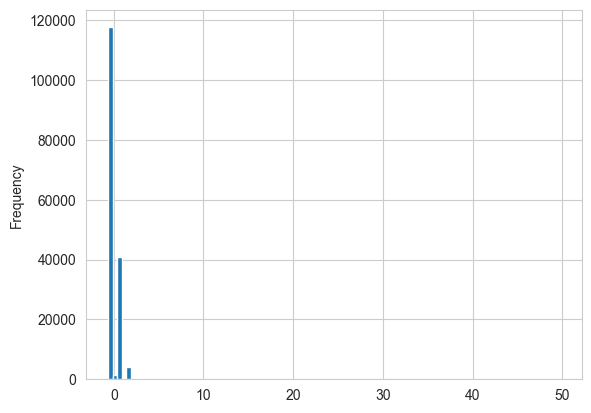

In [167]:
# Let's see the distribution of some of the new features
df_incidents['dfm_state_killed'].plot(kind='hist', bins=100)

<Axes: ylabel='Frequency'>

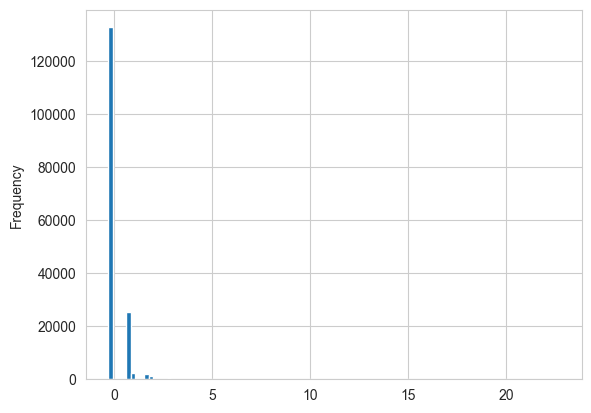

In [168]:
df_incidents['dfm_state_females'].plot(kind='hist', bins=100)

### Distance from the mean of the district
Going even more specifically, we can consider how far a certain feature is from the mean of that feature in the district where the incident occurred.

In [169]:
# We group the incidents by state and congressional district, and we compute the mean of the features
mean_killed_district = df_incidents.groupby(['state', 'congressional_district'])['n_killed'].mean()
mean_injured_district = df_incidents.groupby(['state', 'congressional_district'])['n_injured'].mean()
mean_participants_district = df_incidents.groupby(['state', 'congressional_district'])['n_participants'].mean()
mean_participants_child_district = df_incidents.groupby(['state', 'congressional_district'])['n_participants_child'].mean()
mean_participants_teen_district = df_incidents.groupby(['state', 'congressional_district'])['n_participants_teen'].mean()
mean_females_district = df_incidents.groupby(['state', 'congressional_district'])['n_females'].mean()

df_incidents['dfm_district_killed'] = df_incidents.apply(lambda row: row['n_killed']-mean_killed_district[row['state'], row['congressional_district']], axis=1)

In [170]:

df_incidents['dfm_district_injured'] = df_incidents.apply(lambda row: row['n_injured']-mean_injured_district[row['state'], row['congressional_district']], axis=1)

In [171]:

df_incidents['dfm_district_participants'] = df_incidents.apply(lambda row: row['n_participants']-mean_participants_district[row['state'], row['congressional_district']], axis=1)

In [172]:

df_incidents['dfm_district_child'] = df_incidents.apply(lambda row: row['n_participants_child']-mean_participants_child_district[row['state'], row['congressional_district']], axis=1)

In [173]:
df_incidents['dfm_district_teen'] = df_incidents.apply(lambda row: row['n_participants_teen']-mean_participants_teen_district[row['state'], row['congressional_district']], axis=1)

In [174]:
df_incidents['dfm_district_females'] = df_incidents.apply(lambda row: row['n_females']-mean_females_district[row['state'], row['congressional_district']], axis=1)

<Axes: ylabel='Frequency'>

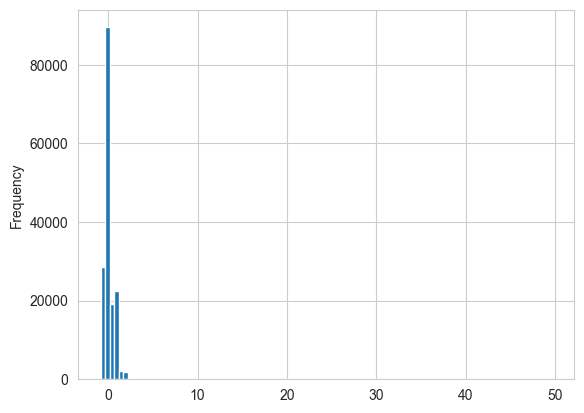

In [175]:
# Let's see the distribution of some new features
df_incidents['dfm_district_killed'].plot(kind='hist', bins=100)

<Axes: ylabel='Frequency'>

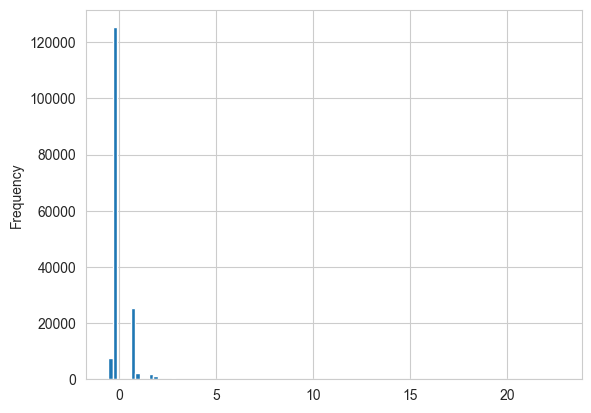

In [176]:
df_incidents['dfm_district_females'].plot(kind='hist', bins=100)

<Axes: ylabel='Frequency'>

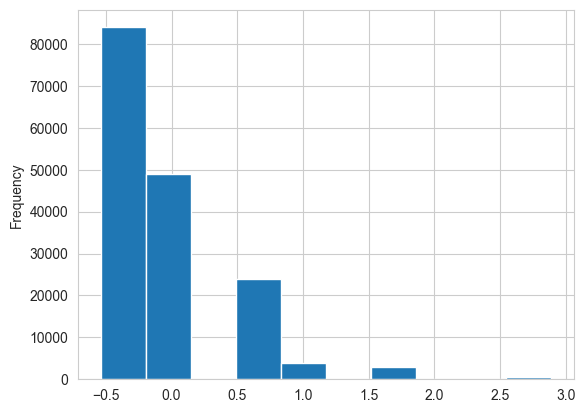

In [177]:
# Focusing on the values <= 3:
df_incidents['dfm_district_females'][df_incidents['dfm_district_females']<=3].plot(kind='hist', bins=10)

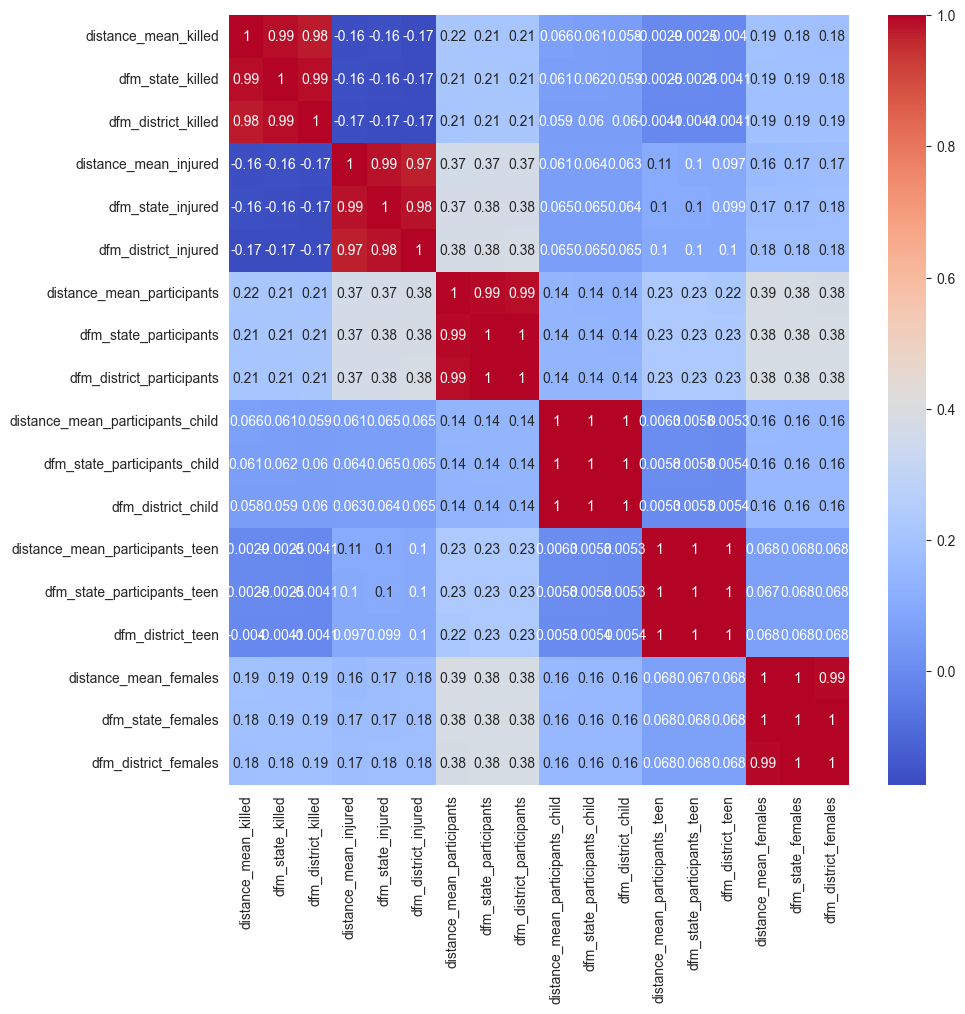

In [178]:
# Let's see the heatmap of the distances from the means of the state, the mean of the district and the global average
plt.figure(figsize=(10, 10))
sns.heatmap(df_incidents[
                [
                    'distance_mean_killed','dfm_state_killed', 'dfm_district_killed',
                    'distance_mean_injured','dfm_state_injured', 'dfm_district_injured',
                    'distance_mean_participants','dfm_state_participants', 'dfm_district_participants',
                    'distance_mean_participants_child','dfm_state_participants_child', 'dfm_district_child',
                    'distance_mean_participants_teen', 'dfm_state_participants_teen', 'dfm_district_teen',
                    'distance_mean_females', 'dfm_state_females', 'dfm_district_females'] ].corr(), annot=True, cmap='coolwarm')
plt.show()

The heatmap shows that the three features are almost equal. We have to decide which ones to keep, and in order to do that we consider the entropy of each feature.

In [179]:
# Entropy of each feature
from scipy.stats import entropy

columns = [
                    'distance_mean_killed','dfm_state_killed', 'dfm_district_killed',
                    'distance_mean_injured','dfm_state_injured', 'dfm_district_injured',
                    'distance_mean_participants','dfm_state_participants', 'dfm_district_participants',
                    'distance_mean_participants_child','dfm_state_participants_child', 'dfm_district_child',
                    'distance_mean_participants_teen', 'dfm_state_participants_teen', 'dfm_district_teen',
                    'distance_mean_females', 'dfm_state_females', 'dfm_district_females']
for col in df_incidents[columns].columns:
    print(col, entropy(df_incidents[col].value_counts(normalize=True)))

distance_mean_killed 0.704528909948731
dfm_state_killed 4.221448568341044
dfm_district_killed 6.3762637634269295
distance_mean_injured 0.937830580564855
dfm_state_injured 4.4485128178286795
dfm_district_injured 6.592301707911603
distance_mean_participants 1.2395457435551962
dfm_state_participants 4.759498820271087
dfm_district_participants 6.911949952538205
distance_mean_participants_child 0.11072057927824112
dfm_state_participants_child 3.642578651800176
dfm_district_child 5.6775354661265425
distance_mean_participants_teen 0.41668446791434244
dfm_state_participants_teen 3.947540333587342
dfm_district_teen 6.087154514285354
distance_mean_females 0.5734548460660637
dfm_state_females 4.101923191214181
dfm_district_females 6.2246618189084995


We choose to drop the distances from the global mean, and the distance from the mean of the state, since their entropy is lower.
 The reason is that a lower entropy is associated to a lower uncertainty

In [180]:
df_incidents.drop(['distance_mean_killed', 'distance_mean_injured', 'distance_mean_participants', 'distance_mean_participants_child',  'distance_mean_participants_teen', 'distance_mean_females' , 'distance_mean_males', 'distance_mean_participants_adult',  'dfm_state_killed', 'dfm_state_injured', 'dfm_state_participants', 'dfm_state_participants_child', 'dfm_state_participants_teen', 'dfm_state_females'], axis=1, inplace=True)

### Voters over the total population
We define the feature `voters_over_population` as the ratio of the number of voters in the state w.r.t. the total population in the state for that year.

In [181]:
total_votes_per_state = df_elections.groupby(['state', 'year'])['totalvotes'].sum()
total_votes_per_state_df = total_votes_per_state.reset_index()
total_votes_per_state_df = total_votes_per_state_df.rename(columns={'totalvotes': 'totalvotes_state'})
total_votes_per_state_df

,state,year,totalvotes_state
0,alabama,1976.0,984181.0
1,alabama,1977.0,984181.0
2,alabama,1978.0,642279.0
3,alabama,1979.0,642279.0
4,alabama,1980.0,1013626.0
...,...,...,...
2397,wyoming,2019.0,201245.0
2398,wyoming,2020.0,278503.0
2399,wyoming,2021.0,278503.0
2400,wyoming,2022.0,198198.0


In [182]:

df_incidents = pd.merge(df_incidents, total_votes_per_state_df, on=['state', 'year'], how='left')
df_incidents['voters_over_population'] = df_incidents['totalvotes_state']/df_incidents['population']

### Histogram of voters_over_population

<Axes: ylabel='Frequency'>

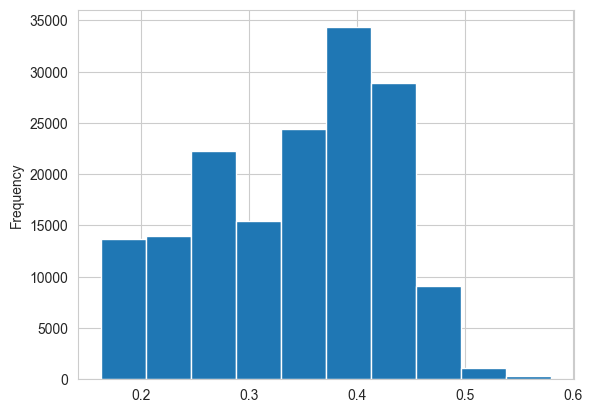

In [183]:
df_incidents['voters_over_population'].plot(kind='hist', bins=10)

## Correlation matrix of the features

C:\Users\HUAWEI\AppData\Local\Temp\ipykernel_26832\3449925750.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_incidents.corr(), annot=True, cmap='coolwarm')


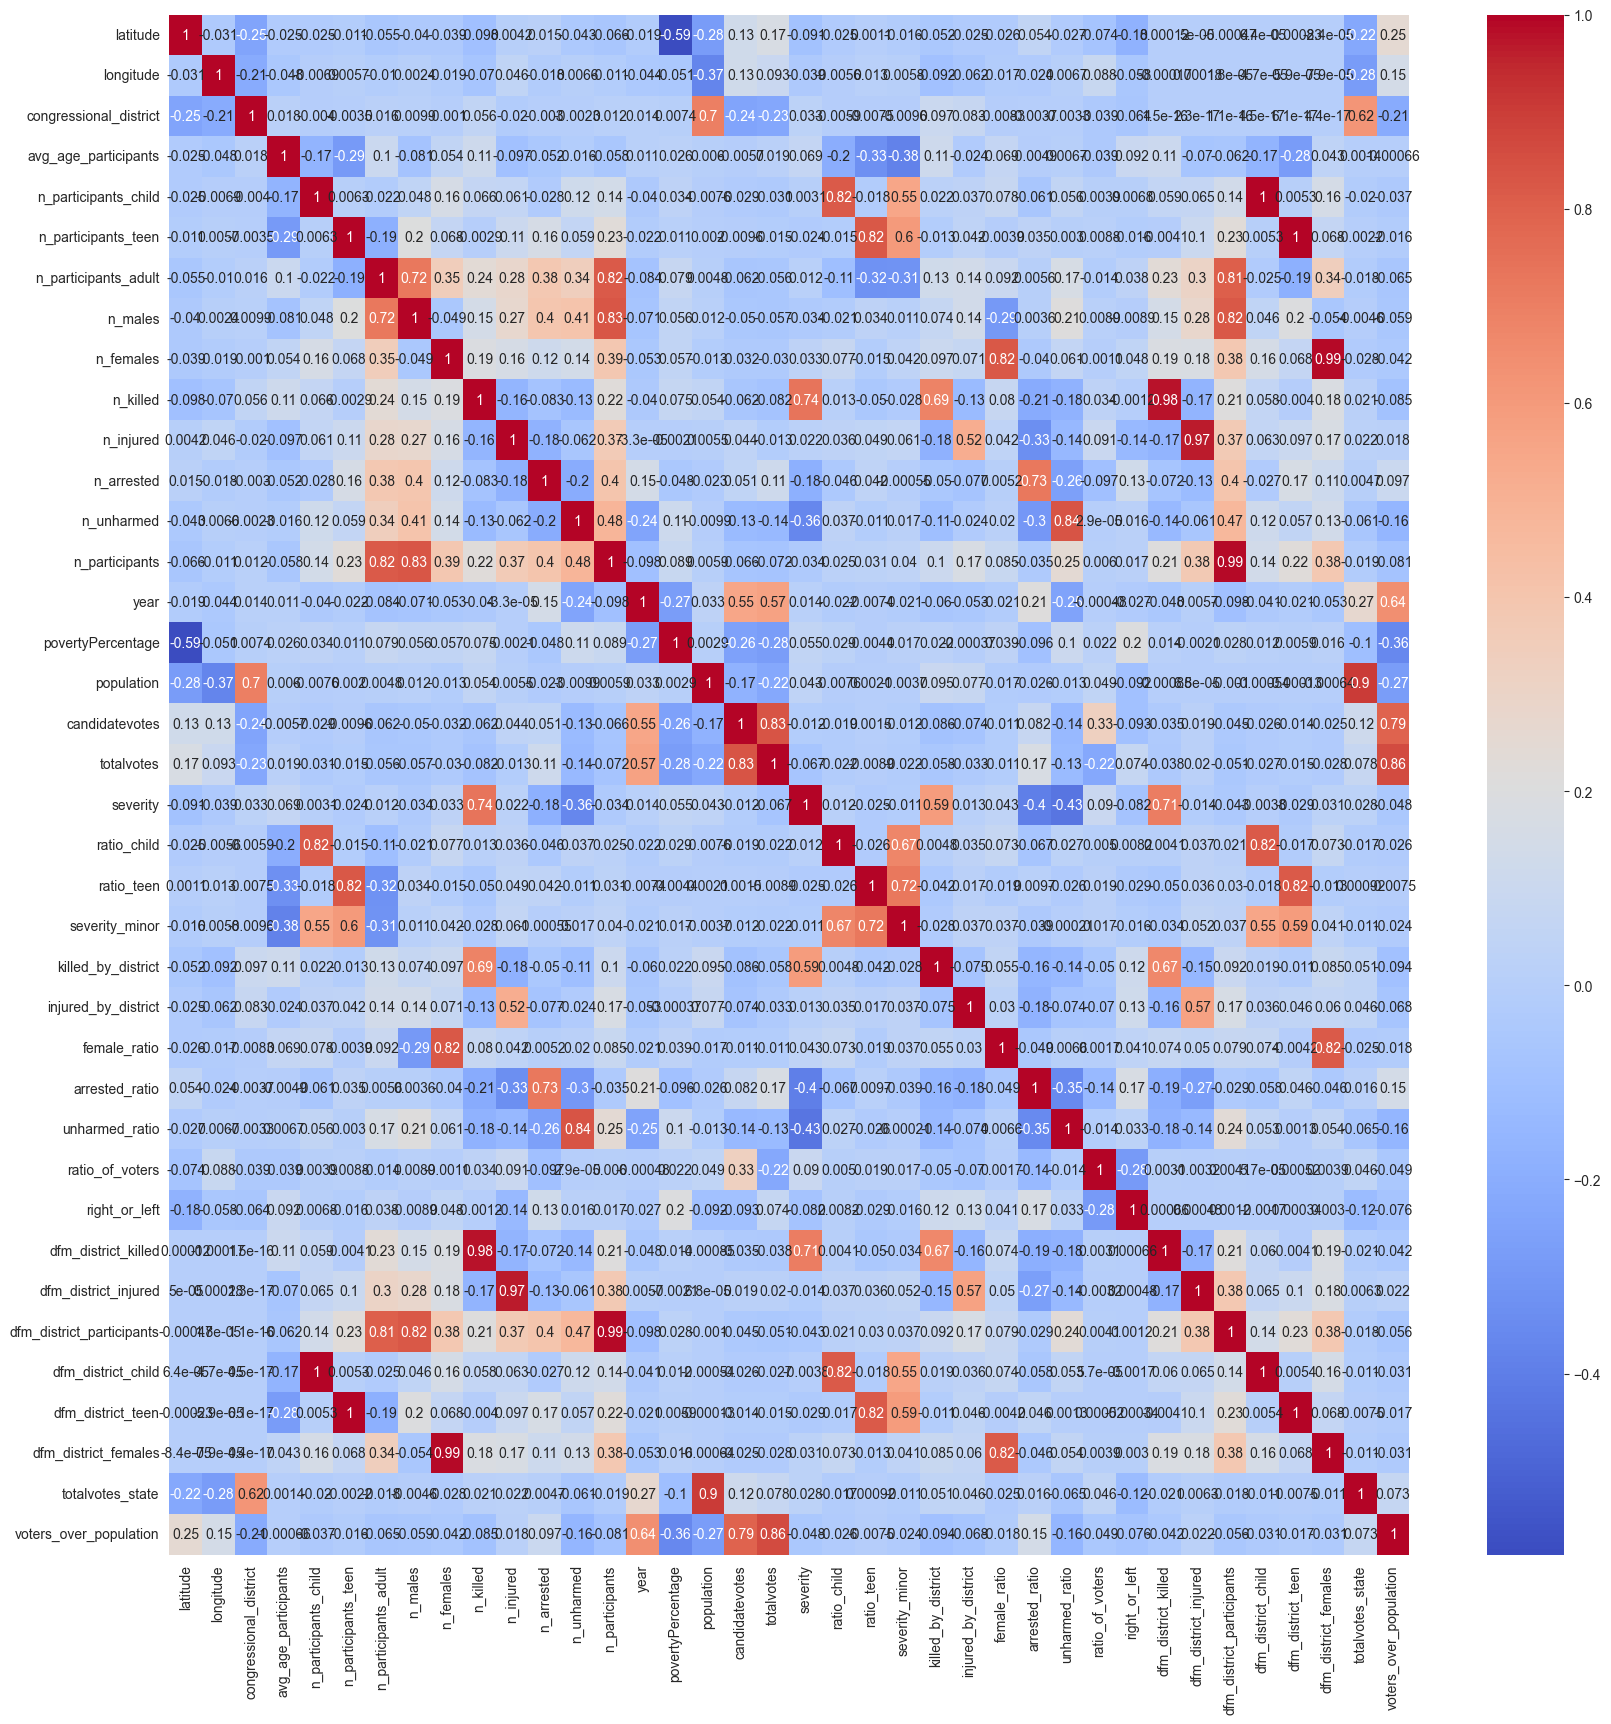

In [185]:
# Let's see the correlation matrix of the features
plt.figure(figsize=(20, 20))
sns.heatmap(df_incidents.corr(), annot=True, cmap='coolwarm')
plt.show()

In [186]:
df_incidents_drop = df_incidents.copy()

In [188]:
# let's print the correlations above a certain threshold
corr_feat=[]
corr_matrix = df_incidents.corr()
for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) > 0.6 and (i!=j):
            corr_feat.append((corr_matrix.columns[i], corr_matrix.columns[j], corr_matrix.iloc[i, j]))
sorted(corr_feat, key=lambda x: abs(x[2]), reverse=True)

C:\Users\HUAWEI\AppData\Local\Temp\ipykernel_26832\3422866211.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df_incidents.corr()


[('dfm_district_child', 'n_participants_child', 0.9969036721517847),
 ('dfm_district_teen', 'n_participants_teen', 0.9955482968533124),
 ('dfm_district_females', 'n_females', 0.9933544268688174),
 ('dfm_district_participants', 'n_participants', 0.9901147631396836),
 ('dfm_district_killed', 'n_killed', 0.9754763640088866),
 ('dfm_district_injured', 'n_injured', 0.9687128866818094),
 ('totalvotes_state', 'population', 0.9046792585094925),
 ('voters_over_population', 'totalvotes', 0.8604240769212114),
 ('unharmed_ratio', 'n_unharmed', 0.837460060180892),
 ('totalvotes', 'candidatevotes', 0.8330559136889792),
 ('n_participants', 'n_males', 0.8309572314276402),
 ('dfm_district_participants', 'n_males', 0.8242796121637795),
 ('female_ratio', 'n_females', 0.8218851824015165),
 ('ratio_teen', 'n_participants_teen', 0.8210052932599465),
 ('ratio_child', 'n_participants_child', 0.8191832778624157),
 ('dfm_district_females', 'female_ratio', 0.8166583918775563),
 ('dfm_district_child', 'ratio_chil

In [ ]:
# we drop the features with high correlation
df_incidents_drop= df_incidents_drop.drop(['totalvotes_state', 'totalvotes',
                                           'n_killed', 'n_arrested',
                                'n_participants', 'n_participants_adult', 'n_participants_teen', 'n_participants_child', 'n_females', 'n_males' ,'n_injured',
                                'n_unharmed', 'ratio_child', 'ratio_teen', 'female_ratio', 'ratio_of_voters'

                                ], axis=1)


C:\Users\HUAWEI\AppData\Local\Temp\ipykernel_26832\505637445.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_incidents_drop.corr(), annot=True, cmap='coolwarm')


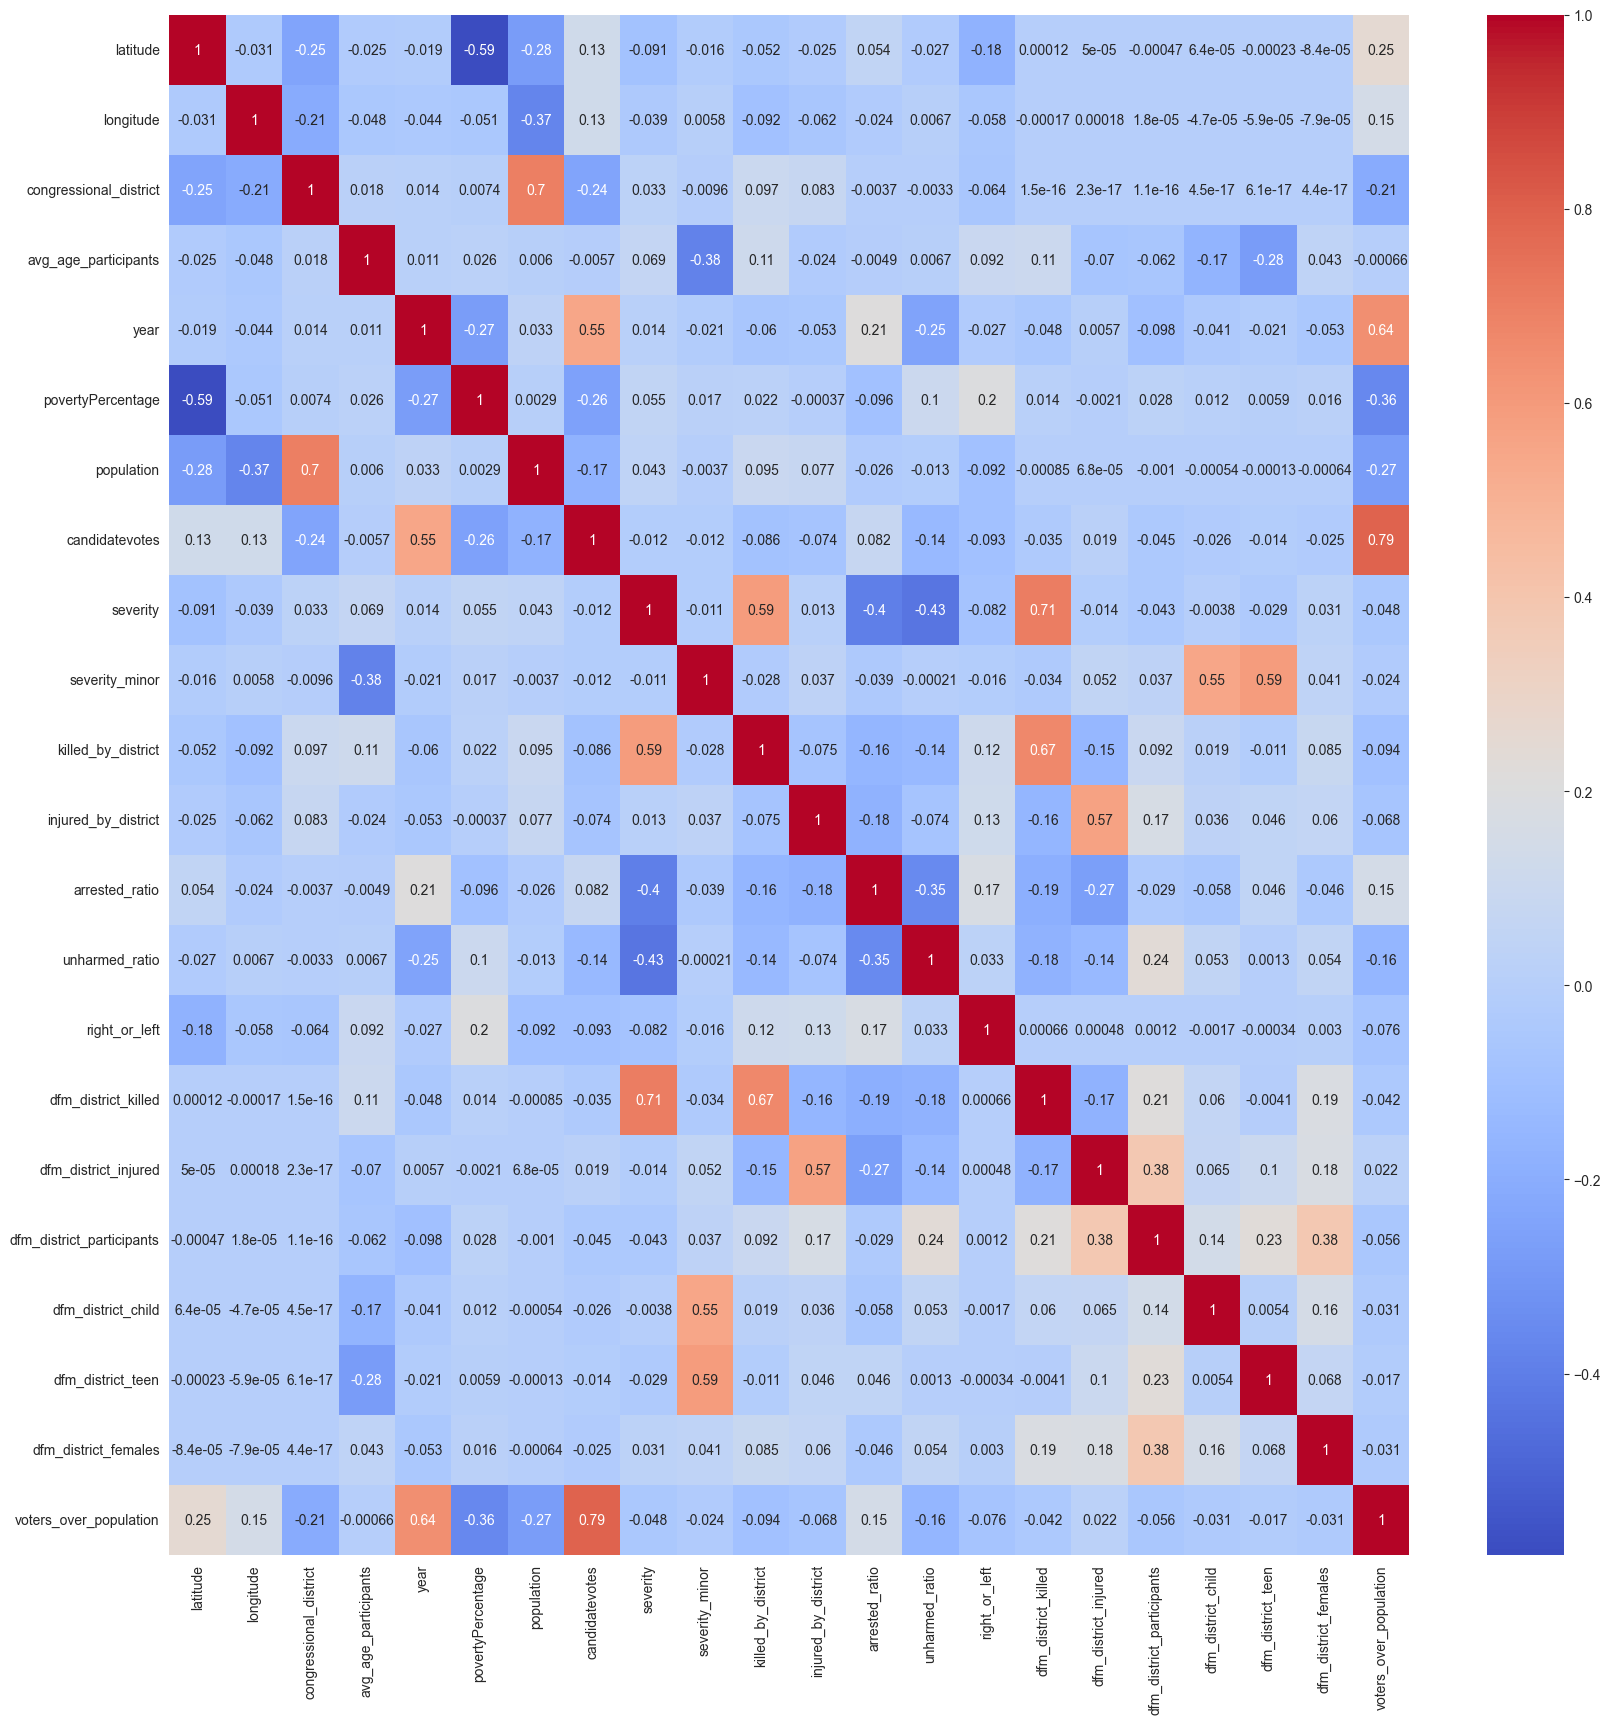

In [193]:
plt.figure(figsize=(20, 20))
sns.heatmap(df_incidents_drop.corr(), annot=True, cmap='coolwarm')
plt.show()

In [195]:
# Let's see if there are any missing values
df_incidents_drop.isnull().sum()


date                             0
state                            0
city_or_county                   0
address                      11884
latitude                         0
longitude                        0
congressional_district           0
avg_age_participants             0
incident_characteristics1        0
year                             0
age_group                        0
povertyPercentage                0
population                       0
party                         1402
candidatevotes                2957
severity                         0
severity_cat                     0
severity_minor                   0
year_month                       0
killed_by_district               0
injured_by_district              0
arrested_ratio                   0
unharmed_ratio                   0
right_or_left                 2957
dfm_district_killed              0
dfm_district_injured             0
dfm_district_participants        0
dfm_district_child               0
dfm_district_teen   

In [202]:
# we drop the rows with missing values (except address)
df_incidents_drop = df_incidents_drop.dropna(subset = df_incidents_drop.columns.drop(['address']))

df_incidents_drop.isnull().sum()

date                             0
state                            0
city_or_county                   0
address                      11702
latitude                         0
longitude                        0
congressional_district           0
avg_age_participants             0
incident_characteristics1        0
year                             0
age_group                        0
povertyPercentage                0
population                       0
party                            0
candidatevotes                   0
severity                         0
severity_cat                     0
severity_minor                   0
year_month                       0
killed_by_district               0
injured_by_district              0
arrested_ratio                   0
unharmed_ratio                   0
right_or_left                    0
dfm_district_killed              0
dfm_district_injured             0
dfm_district_participants        0
dfm_district_child               0
dfm_district_teen   

## Save the updated dataset

In [203]:
df_incidents_drop.to_csv('../dataset_preparation/incidents_prepared.csv', index=False)
